In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv("housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Data Cleaning

In [129]:
cdf = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price', 'Price(USD)']]

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
max_area_threshold = 300
le = LabelEncoder()

# Remove empty Address
cdf = cdf[cdf['Address'].notna()]

# Fit and transform the address column
cdf['Address_encoded'] = le.fit_transform(cdf['Address'])
#cdf['Address'] = le.inverse_transform(cdf['Address_encoded'])

# Convert string data to int
cdf['Area'] = pd.to_numeric(cdf['Area'], errors='coerce')

# Remove unreasonable Area 
cdf = cdf[(cdf['Area'] > 10) & (cdf['Area'] <= max_area_threshold)]

# Convert True/ False into 1/0
cdf['Parking'] = cdf['Parking'].astype(int)
cdf['Warehouse'] = cdf['Warehouse'].astype(int)
cdf['Elevator'] = cdf['Elevator'].astype(int)

# drop original Address
cdf = cdf.drop(["Address"], axis = 1)
cdf.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_encoded
0,63.0,1,1,1,1,1.850000e+09,61666.67,156
1,60.0,1,1,1,1,1.850000e+09,61666.67,156
2,79.0,2,1,1,1,5.500000e+08,18333.33,117
3,95.0,2,1,1,1,9.025000e+08,30083.33,152
4,123.0,2,1,1,1,7.000000e+09,233333.33,150


array([[<Axes: title={'center': 'Area'}>]], dtype=object)

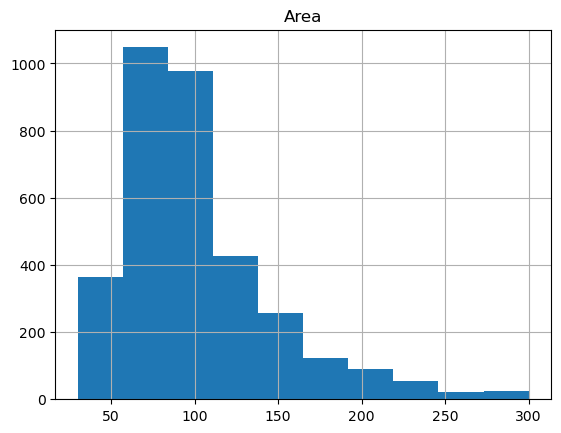

In [130]:
cdf.hist('Area')

Correlation Template Code

<Axes: >

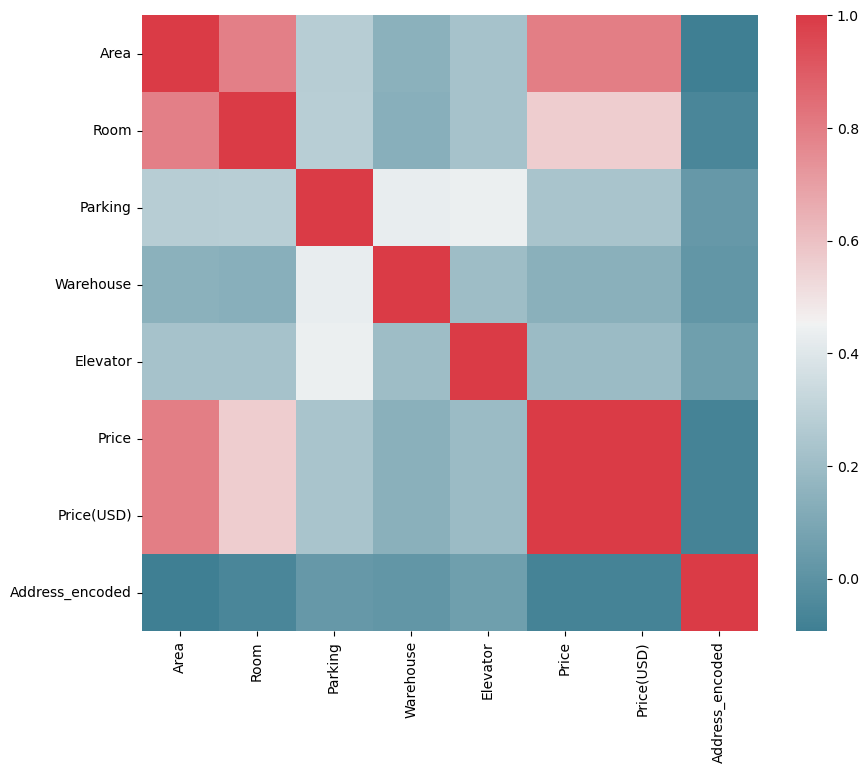

In [131]:
# import packages
import seaborn as sns

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = cdf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [132]:
# Univariate Testing: Regression Task Code Template
from sklearn.feature_selection import SelectKBest, f_regression

# import data
X_all = cdf.drop(["Price(USD)", "Price"], axis = 1)
y = cdf["Price"]

feature_selector = SelectKBest(f_regression, k = "all")
fit = feature_selector.fit(X_all,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X_all.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 4

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X = X_all[selected_variables]
X

,Area,Room,Parking,Elevator,Warehouse,Address_encoded
0,63.0,1,1,1,1,156
1,60.0,1,1,1,1,156
2,79.0,2,1,1,1,117
3,95.0,2,1,1,1,152
4,123.0,2,1,1,1,150
...,...,...,...,...,...,...
3474,86.0,2,1,1,1,163
3475,83.0,2,1,1,1,105
3476,75.0,2,0,0,0,115
3477,105.0,2,1,1,1,39


Optimal number of features: 5


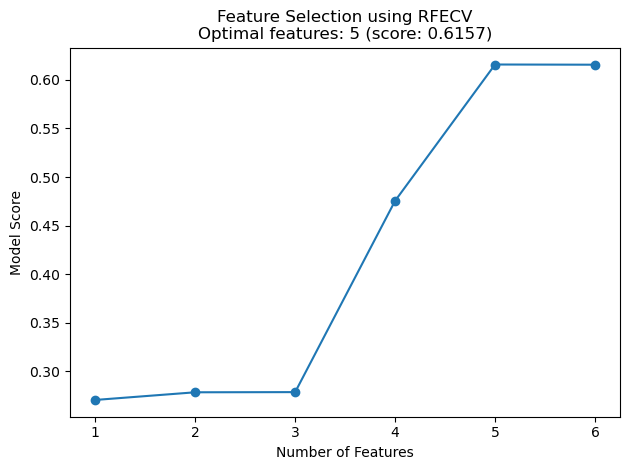

,Area,Room,Parking,Warehouse,Elevator
0,63.0,1,1,1,1
1,60.0,1,1,1,1
2,79.0,2,1,1,1
3,95.0,2,1,1,1
4,123.0,2,1,1,1
...,...,...,...,...,...
3474,86.0,2,1,1,1
3475,83.0,2,1,1,1
3476,75.0,2,0,0,0
3477,105.0,2,1,1,1


In [133]:
# Recursive Feature Elimination with CV Code
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
X_all = cdf.drop(["Price(USD)", "Price"], axis = 1)
y = cdf["Price"]

# Model and selector
regressor = LinearRegression()
feature_selector = RFECV(regressor)

# Fit
fit = feature_selector.fit(X_all, y)

# Optimal number of features
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

# Reduced feature set
X = X_all.loc[:, feature_selector.support_]

# Plot score vs number of features
mean_scores = fit.cv_results_['mean_test_score'] if hasattr(fit, 'cv_results_') else fit.grid_scores_
plt.plot(range(1, len(mean_scores) + 1), mean_scores, marker="o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFECV\nOptimal features: {optimal_feature_count} "
          f"(score: {round(max(mean_scores), 4)})")
plt.tight_layout()
plt.show()
X

In [134]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select columns to normalize
cols = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price']

cdf_scaled = cdf.copy()
cdf_scaled[cols] = scaler.fit_transform(cdf[cols])
#cdf_original[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price']] = scaler.inverse_transform(cdf_scaled[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price']])

cdf_scaled.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_encoded
0,-0.823254,-1.466873,0.426699,0.303013,0.510675,-0.494791,61666.67,156
1,-0.889292,-1.466873,0.426699,0.303013,0.510675,-0.494791,61666.67,156
2,-0.471053,-0.072418,0.426699,0.303013,0.510675,-0.710230,18333.33,117
3,-0.118851,-0.072418,0.426699,0.303013,0.510675,-0.651813,30083.33,152
4,0.497502,-0.072418,0.426699,0.303013,0.510675,0.358679,233333.33,150


In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select columns to normalize
cols = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price']

# Fit to data and transform
cdf_scaled = cdf.copy()
cdf_scaled[cols] = scaler.fit_transform(cdf[cols])

cdf_scaled.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_encoded
0,0.122222,0.2,1.0,1.0,1.0,0.032113,61666.67,156
1,0.111111,0.2,1.0,1.0,1.0,0.032113,61666.67,156
2,0.181481,0.4,1.0,1.0,1.0,0.009503,18333.33,117
3,0.240741,0.4,1.0,1.0,1.0,0.015634,30083.33,152
4,0.344444,0.4,1.0,1.0,1.0,0.121684,233333.33,150


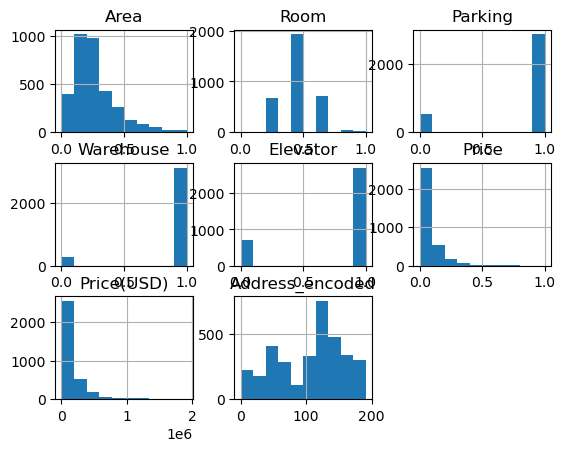

In [136]:
cdf_scaled.hist()
plt.show()

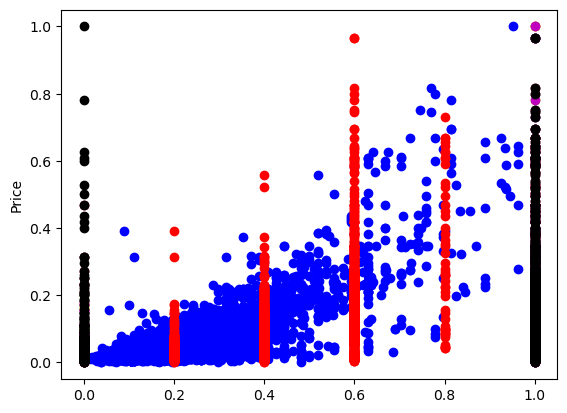

In [137]:
# Visual analysing
plt.scatter(cdf_scaled.Area, cdf_scaled.Price, color= 'b')
plt.scatter(cdf_scaled.Room, cdf_scaled.Price, color = 'r')
plt.scatter(cdf_scaled.Parking, cdf_scaled.Price, color= 'y')
plt.scatter(cdf_scaled.Warehouse, cdf_scaled.Price, color= 'm')
plt.scatter(cdf_scaled.Elevator, cdf_scaled.Price, color= 'k')

#plt.xlabel("Address")
plt.ylabel('Price')
plt.show()

In [138]:
msk = np.random.randn(len(cdf_scaled)) < 0.8
train = cdf_scaled[msk]
test = cdf_scaled[~msk]

# Data preparation
x_train = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
y_train = np.asanyarray(train[['Price']])

x_test = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']]) 
y_test = np.asanyarray(test[['Price']])

## Multiple Linear Regression

In [139]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)

y_test_ = regr.predict(x_test)

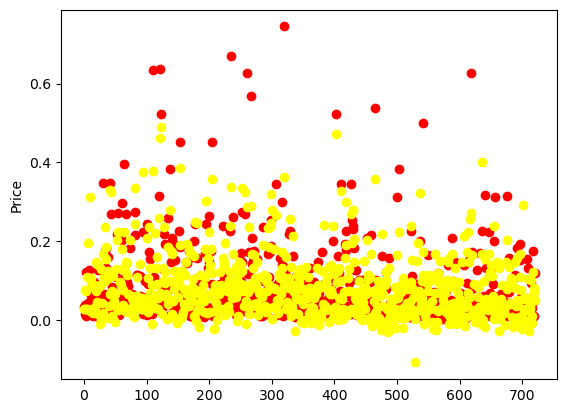

In [140]:
# Display Trained and Train Data after learning
plt.scatter(np.arange(len(y_test)), y_test, color = 'red')
plt.scatter(np.arange(len(y_test_)), y_test_, color = 'yellow')
plt.ylabel('Price')
plt.show()

In [141]:
# Evaluation
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)
print(f"Residual sum of squares: '{np.mean((y_test_ - y_test) ** 2)}'")
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficients:  [[ 0.59813932 -0.14890546  0.0034771   0.00999513  0.00366965]]
Intercept:  [-0.02535988]
Residual sum of squares: '0.0038403294194028804'
Variance score: 0.60


## Adding Polynomial Regression

In [142]:
from sklearn.preprocessing import PolynomialFeatures

# Select variables
lin_col = ['Parking', 'Warehouse', 'Elevator', 'Room']
poly_col = ['Area']
linear_x_train = np.asanyarray(train[lin_col])
linear_x_test = np.asanyarray(test[lin_col]) 

poly_x_train = np.asanyarray(train[poly_col]) 
poly_x_test = np.asanyarray(test[poly_col]) 

# Generate polynomial features for selected variables
poly = PolynomialFeatures(degree = 2, include_bias=False)
poly_x_area = poly.fit_transform(poly_x_train)
poly_x_area_t = poly.fit_transform(poly_x_test)

# Combine with linear variables
X = np.append(linear_x_train, poly_x_area, axis=1)
Xt = np.append(linear_x_test, poly_x_area_t, axis=1)

clf = LinearRegression()
clf.fit(X, y_train)
y_test_1 = clf.predict(Xt)

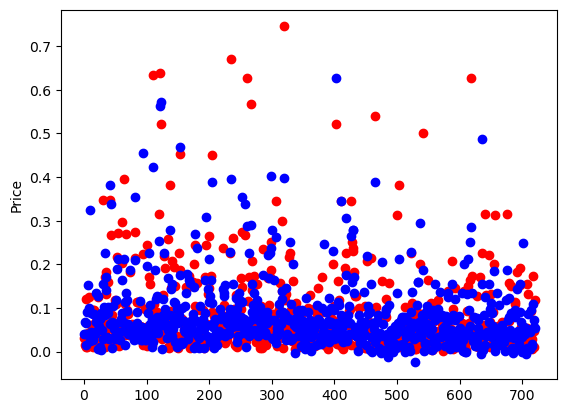

In [143]:
# Display
plt.scatter(np.arange(len(y_test)), y_test, color = 'red')
plt.scatter(np.arange(len(y_test_)), y_test_1, color = 'blue')
plt.ylabel('Price')
plt.show()

In [144]:
x_test.shape

(721, 5)

In [145]:
# Evaluation
print ('Coefficients: ', clf.coef_)
print ('Intercept: ', clf.intercept_)

print(f"Residual sum of squares: '{np.mean((y_test_1 - y_test) ** 2)}'")
print(f'Variance score: "{clf.score(Xt, y_test)}"')

Coefficients:  [[ 0.01100114  0.01121746  0.01742353 -0.052293    0.11169671  0.52421119]]
Intercept:  [-0.00723622]
Residual sum of squares: '0.003348422290334716'
Variance score: "0.6518191503336364"


## Adding two divided Polynomial Regression

Dividing variables to three parts: Linear, Pplynominal, and Nonlinear

In [146]:
# Select variables
lin_col = ['Room']
poly_col = ['Area']
non_lin_col = ['Parking', 'Warehouse', 'Elevator']


linear_x_train = np.asanyarray(train[lin_col])
linear_x_test = np.asanyarray(test[lin_col]) 

poly_x_train = np.asanyarray(train[poly_col]) 
poly_x_test = np.asanyarray(test[poly_col]) 

non_lin_x_train = np.asanyarray(train[non_lin_col])
non_lin_x_test = np.asanyarray(test[non_lin_col])

In [147]:
# Generate polynomial features for selected variables
poly = PolynomialFeatures(degree = 2, include_bias=False)
poly_x_area = poly.fit_transform(poly_x_train)
poly_x_area_t = poly.fit_transform(poly_x_test)

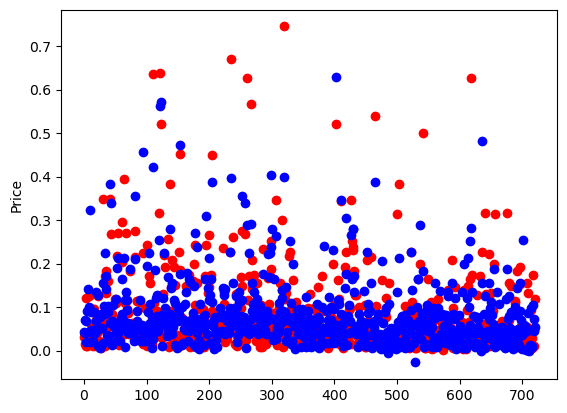

In [151]:
# Generate interaction features only (no polynomial powers)
poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
non_linear_area = poly.fit_transform(non_lin_x_train)
non_linear_area_t = poly.fit_transform(non_lin_x_test)



# Combine with linear variables
X_2 = np.concatenate((linear_x_train, poly_x_area, non_linear_area), axis=1)
Xt_2 = np.concatenate((linear_x_test, poly_x_area_t, non_linear_area_t), axis=1)

clf_2 = LinearRegression()
clf_2.fit(X_2, y_train)
y_test_2 = clf_2.predict(Xt_2)

plt.scatter(np.arange(len(y_test)), y_test, color = 'red')
plt.scatter(np.arange(len(y_test_2)), y_test_2, color = 'blue')
plt.ylabel('Price')
plt.show()


In [152]:
#Evaluation
print ('Coefficients: ', clf_2.coef_)
print ('Intercept: ', clf_2.intercept_)

print(f"Residual sum of squares: '{np.mean((y_test_2 - y_test) ** 2)}'")
print(f'Variance score: "{clf_2.score(Xt_2, y_test)}"')

Coefficients:  [[-0.04679685  0.09657058  0.53604754 -0.0011221   0.01019812  0.00450449
   0.00166104  0.01555346 -0.00342977  0.00735295]]
Intercept:  [-0.00071369]
Residual sum of squares: '0.003344673662688655'
Variance score: "0.6522089459584761"


## ٍEvaluation

In [153]:
print("******** Multiple Linear Regression *********")
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)
print(f"Residual sum of squares: '{np.mean((y_test_ - y_test) ** 2)}'")
print('Variance score: %.2f' % regr.score(x_test, y_test))

******** Multiple Linear Regression *********
Coefficients:  [[ 0.59813932 -0.14890546  0.0034771   0.00999513  0.00366965]]
Intercept:  [-0.02535988]
Residual sum of squares: '0.0038403294194028804'
Variance score: 0.60


In [154]:
print("******** Adding Polynomial Regression  on 'Area' *********")
print ('Coefficients: ', clf.coef_)
print ('Intercept: ', clf.intercept_)
print(f"Residual sum of squares: '{np.mean((y_test_ - y_test) ** 2)}'")
print(f'Variance score: "{clf.score(Xt, y_test)}"')

******** Adding Polynomial Regression  on 'Area' *********
Coefficients:  [[ 0.01100114  0.01121746  0.01742353 -0.052293    0.11169671  0.52421119]]
Intercept:  [-0.00723622]
Residual sum of squares: '0.0038403294194028804'
Variance score: "0.6518191503336364"


In [155]:
print("******** Adding Polynomial Regression on 'Area' and 'Parking', 'Warehouse', 'Elevator'*********")
print ('Coefficients: ', clf_2.coef_)
print ('Intercept: ', clf_2.intercept_)
print(f"Residual sum of squares: '{np.mean((y_test_2 - y_test) ** 2)}'")
print(f'Variance score: "{clf_2.score(Xt_2, y_test)}"')

******** Adding Polynomial Regression on 'Area' and 'Parking', 'Warehouse', 'Elevator'*********
Coefficients:  [[-0.04679685  0.09657058  0.53604754 -0.0011221   0.01019812  0.00450449
   0.00166104  0.01555346 -0.00342977  0.00735295]]
Intercept:  [-0.00071369]
Residual sum of squares: '0.003344673662688655'
Variance score: "0.6522089459584761"
